In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('./diabetes_feature.csv')
df.shape

(768, 16)

In [3]:
df.head()
# 강의자 diabetes_feature.csv와 Glucose가 다름
# WHY) 나는 Scale한 값을 저장했기때문
# => 원본파일의 Glucose column을 불러와 이곳의 Glucose로 대체해야함

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_Insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,102.5,4.639572,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,169.5,5.138735,False
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,102.5,4.639572,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


In [3]:
df_original=pd.read_csv('./diabetes.csv')
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Glucose']=df_original['Glucose']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_Insulin
0,6,148,72,35,0,33.6,0.468492,50,1,False,False,True,False,102.5,4.639572,False
1,1,85,66,29,0,26.6,-0.365061,31,0,False,False,True,False,169.5,5.138735,False
2,8,183,64,0,0,23.3,0.604397,32,1,True,False,True,False,102.5,4.639572,False
3,1,89,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


In [5]:
from sklearn.model_selection import train_test_split

train_test_split?

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_Insulin'],
      dtype='object')

In [6]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_Insulin']]
X.shape

(768, 9)

In [7]:
y=df['Outcome']
y.shape

(768,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_Insulin
60,84,0,0,0.0,-0.507006,21,False,169.5,False
618,112,82,24,28.2,2.446670,50,True,102.5,False
346,139,46,19,28.7,0.550035,22,False,83.0,False
294,161,50,0,21.9,-0.658012,65,False,169.5,False
231,134,80,37,46.2,-0.706334,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,-0.183854,26,False,140.0,False
106,96,122,0,22.4,-0.799958,27,False,169.5,False
270,101,86,37,45.6,2.005732,38,True,102.5,False
435,141,0,0,42.4,-0.805998,29,False,102.5,False


In [10]:
X_train.shape,y_train.shape

((614, 9), (614,))

In [11]:
X_test.shape,y_test.shape

((154, 9), (154,))

# -----

In [14]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [15]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
feature_names=X_train.columns.tolist()

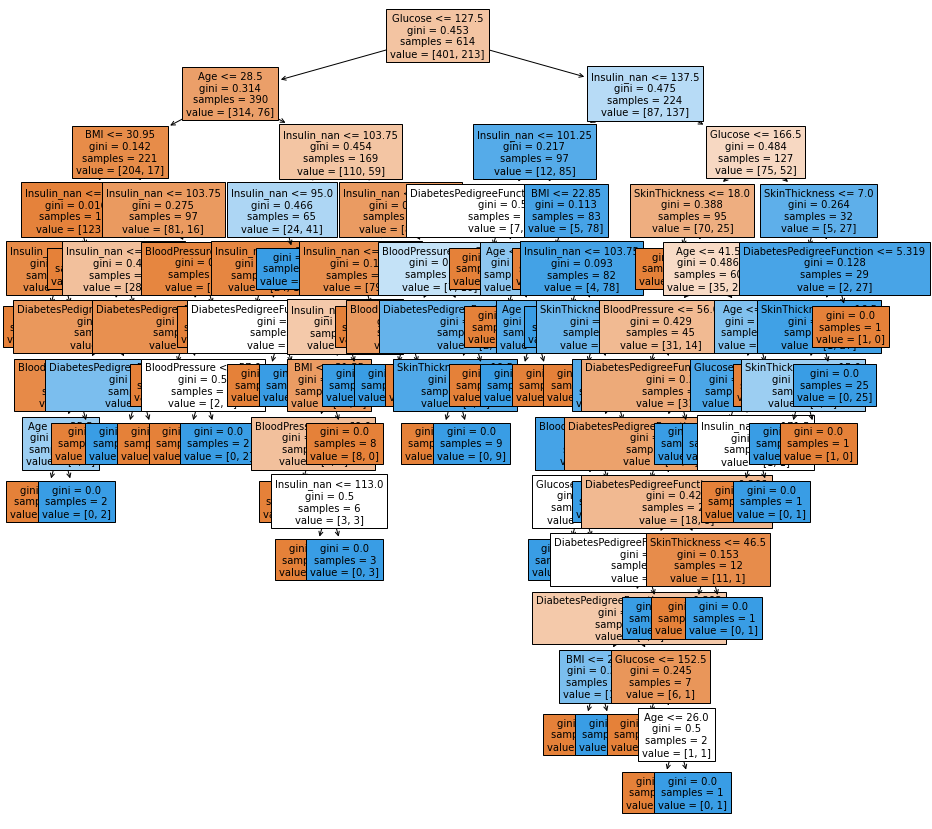

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree=plot_tree(model,feature_names=feature_names,fontsize=10,filled=True)

In [18]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [19]:
# 정확도 구하기 1
(y_pred==y_test).mean()
# -> 정확도가 ~02.ipynb보다 낮은 이유는 train-test set을 순서대로가 아닌 random split했기때문

0.8116883116883117

In [20]:
# 정확도 구하기 2

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

81.16883116883116

# -----

In [21]:
# max_depth option을 다르게 주어 최적의 파라미터를 찾는다

from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)
# -> max_depth가 4, 5일대 최고성능을 냄

3 80.51948051948052
4 84.4155844155844
5 84.4155844155844
6 83.11688311688312
7 83.11688311688312
8 82.46753246753246
9 81.81818181818183
10 81.81818181818183
11 81.16883116883116


# -----

In [22]:
# 위의 내용(최적의 하이퍼파라미터 찾기)를 GridSearch이용해서 하기

from sklearn.model_selection import GridSearchCV

model=DecisionTreeClassifier(random_state=42)
param_grid={'max_depth':range(3,12),
           'max_features':[0.3,0.5,0.7,0.9,1]}

# cv=5는 k-fold의 k=5라는 뜻
clf=GridSearchCV(model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=1)
clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [23]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    5.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [24]:
clf.best_params_

{'max_depth': 8, 'max_features': 0.5}

In [25]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=0.5, random_state=42)

In [26]:
clf.best_score_

0.8615753698520592

In [27]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.007579,2.238706e-03,0.011569,1.129500e-02,8,0.5,"{'max_depth': 8, 'max_features': 0.5}",0.821138,0.894309,0.821138,0.902439,0.868852,0.861575,0.034827,1
21,0.006582,7.976895e-04,0.003192,3.987575e-04,7,0.5,"{'max_depth': 7, 'max_features': 0.5}",0.845528,0.918699,0.837398,0.829268,0.860656,0.858310,0.031926,2
16,0.012167,4.477786e-03,0.004987,3.512130e-03,6,0.5,"{'max_depth': 6, 'max_features': 0.5}",0.837398,0.910569,0.829268,0.869919,0.836066,0.856644,0.030422,3
43,0.010172,6.383371e-03,0.008178,7.091011e-03,11,0.9,"{'max_depth': 11, 'max_features': 0.9}",0.886179,0.910569,0.796748,0.837398,0.844262,0.855031,0.039695,4
36,0.012167,1.287156e-02,0.002793,3.990412e-04,10,0.5,"{'max_depth': 10, 'max_features': 0.5}",0.853659,0.918699,0.772358,0.869919,0.852459,0.853419,0.047129,5
33,0.007621,2.210713e-03,0.002751,3.864571e-04,9,0.9,"{'max_depth': 9, 'max_features': 0.9}",0.878049,0.910569,0.796748,0.837398,0.844262,0.853405,0.038535,6
38,0.010372,5.224470e-03,0.002992,6.143617e-07,10,0.9,"{'max_depth': 10, 'max_features': 0.9}",0.853659,0.910569,0.796748,0.861789,0.844262,0.853405,0.036419,6
11,0.013762,8.884342e-03,0.004785,3.592064e-03,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.845528,0.878049,0.853659,0.845528,0.844262,0.853405,0.012768,6
18,0.008976,2.523098e-03,0.007381,5.802122e-03,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.837398,0.894309,0.804878,0.829268,0.893443,0.851859,0.035938,9
12,0.007982,1.411556e-03,0.011167,1.389827e-02,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.861789,0.878049,0.804878,0.837398,0.877049,0.851833,0.027696,10


In [28]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [29]:
clf.score(X_test,y_test)

0.8636363636363636

# -----

In [30]:
param_distributions={'max_depth':range(2,20),
                    'max_features':[0.1,0.3,0.5,0.7,0.9,1.0]}

In [31]:
# GridSearch 대신 RandomSearch이용해보기

from sklearn.model_selection import RandomizedSearchCV

clf=RandomizedSearchCV(model,
                  param_distributions=param_distributions,
                  n_iter=10,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=5,
                  random_state=42)

clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': [0.1, 0.3, 0.5, 0.7,
                                                         0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [32]:
clf.best_params_

{'max_features': 1.0, 'max_depth': 14}

In [33]:
clf.best_score_
# -> 아직까지는 GridSearch와 RandomSearch의 차이를 모르겠음

0.856710649073704

In [42]:
# 원래는 (1,20,10),(0.4,1.0,100)이었는데 cv_results_보고 수정
max_depth=np.random.randint(3,20,10)
max_features=np.random.uniform(0.7,1.0,100)

In [43]:
param_distributions={'max_depth':max_depth,
                    'max_features':max_features,
                    'min_samples_split':list(range(2,7))}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
# n_iter=100 -> 1000
clf=RandomizedSearchCV(model,
                  param_distributions=param_distributions,
                  n_iter=1000,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=5,
                  random_state=42)

clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([10,  6, 18,  5, 11, 18,  4,  8, 10, 19]),
                                        'max_features': array([0.74133434, 0.78843216, 0.71757284, 0.90368348, 0.86554234,
       0.88042417, 0.70661184, 0.77790386, 0.88208212, 0.97660948,
       0.8200252 , 0.89971843, 0.75958445, 0.73343071, 0.99303781,...
       0.83932533, 0.88317023, 0.74760872, 0.79858849, 0.80711127,
       0.94642312, 0.91803408, 0.75929115, 0.91816942, 0.78085327,
       0.79205421, 0.90203173, 0.73143988, 0.79148338, 0.85395071,
       0.99460965, 0.88192019, 0.93227546, 0.84055919, 0.94902696,
       0.84183586, 0.7789361 , 0.92445707, 0.71815515, 0.97259193,
       0.95372048, 0.89170389, 0.73702478, 0.96249504, 0.85286287]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, 

In [50]:
clf.best_params_

{'min_samples_split': 2, 'max_features': 0.7808532700268088, 'max_depth': 10}

In [51]:
clf.best_score_

0.8713181394109023

In [52]:
clf.score(X_test,y_test)
# -> 강의자는 80%후반의 정확도가 나왔지만 나는 더 낮음

0.8116883116883117

In [53]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
782,0.013364,0.008677,0.005412,0.003494,2,0.777904,10,"{'min_samples_split': 2, 'max_features': 0.777...",0.853659,0.918699,0.878049,0.845528,0.860656,0.871318,0.026004,1
686,0.007082,0.000664,0.003326,0.000393,2,0.858932,10,"{'min_samples_split': 2, 'max_features': 0.858...",0.853659,0.918699,0.878049,0.845528,0.860656,0.871318,0.026004,1
517,0.007668,0.000756,0.007097,0.005466,2,0.827988,10,"{'min_samples_split': 2, 'max_features': 0.827...",0.853659,0.918699,0.878049,0.845528,0.860656,0.871318,0.026004,1
353,0.014672,0.013134,0.003990,0.001092,2,0.786474,10,"{'min_samples_split': 2, 'max_features': 0.786...",0.853659,0.918699,0.878049,0.845528,0.860656,0.871318,0.026004,1
955,0.008584,0.001028,0.003696,0.000607,2,0.841836,10,"{'min_samples_split': 2, 'max_features': 0.841...",0.853659,0.918699,0.878049,0.845528,0.860656,0.871318,0.026004,1


# -----

In [12]:
# single tree
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred=model.predict(X_test)

In [16]:
(y_pred==y_test).mean()

0.8051948051948052

In [17]:
# 이제는 DecisionTree가 아닌 앙상블기법을 사용
# 데이터를 샘플링하여 여러개의 트리를 그리는 것 = Random Forest(bootstrap,bagging)

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [18]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred=model.predict(X_test)

In [20]:
(y_pred==y_test).mean()
# -> 더 좋은 성능

0.8766233766233766

# ------

In [21]:
# 이번엔 bagging말고 boosting이용
# bagging + 가중치

from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [22]:
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [23]:
y_pred=model.predict(X_test)

In [24]:
(y_pred==y_test).mean()

0.8701298701298701

# -----

In [25]:
# 여러개의 알고리즘을 사용해서 비교하기

from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV?

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

estimators=[DecisionTreeClassifier(random_state=42),
            RandomForestClassifier(random_state=42),
            GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [39]:
max_depth=np.random.randint(2,20,10)
max_features=np.random.uniform(0.3,1.0,10)

param_distributions={'max_depth':max_depth,
                    'max_features':max_features}

results=[]
for estimator in estimators:
    result=[]
    if estimator.__class__.__name__!='DecisionTreeClassifier':
        param_distributions['n_estimators']=np.random.randint(100,1000,10)
    clf=RandomizedSearchCV(estimator,param_distributions,n_iter=10,
                      scoring='accuracy',n_jobs=-1,
                      cv=5,verbose=2)
    clf.fit(X_train,y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test,y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.4s finished


In [40]:
pd.DataFrame(results,
             columns=['estimator','best_params','train_score','test_score','cv_result'])

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.784640503991576, 'max_depth...",0.869692,0.818182,"{'mean_fit_time': [0.009574985504150391, 0.015..."
1,RandomForestClassifier,"{'n_estimators': 689, 'max_features': 0.615022...",0.879475,0.876623,"{'mean_fit_time': [2.7597901821136475, 2.89874..."
2,GradientBoostingClassifier,"{'n_estimators': 118, 'max_features': 0.652556...",0.897388,0.863636,"{'mean_fit_time': [1.3376174449920655, 4.81725..."
